<h2><b>盗難自転車</b></h2>  
粟野翔

In [ ]:
import pandas as pd

df = pd.read_csv("jitensha.csv")
df.head()

,罪名,手口,管轄警察署（発生地）,管轄交番・駐在所（発生地）,市区町村コード（発生地）,都道府県（発生地）,市区町村（発生地）,町丁目（発生地）,発生年月日（始期）,発生時（始期）,発生場所,発生場所の詳細,被害者の年齢,被害者の職業,施錠関係
0,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240117,23,その他の住宅（３階建て以下共同住宅等）,駐車（輪）場,20歳代,大学生,施錠した
1,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240227,18,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
2,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240528,20,駐車（輪）場,駐車（輪）場,40歳代,その他,施錠した
3,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240627,21,駐車（輪）場,駐車（輪）場,10歳代,中学生,施錠せず
4,窃盗,自転車盗,千葉中央,千葉寺駅前,121011.0,千葉県,千葉市中央区,青葉町,20240917,14,その他,その他,20歳代,その他,施錠せず


どの地区で何件くらい盗難されているのでしょうか？  
多い順に表示してみます。

In [2]:
df.groupby('市区町村（発生地）').size().sort_values(ascending=False)

市区町村（発生地）
船橋市        1263
市川市         872
柏市          691
松戸市         678
千葉市中央区      656
八千代市        458
習志野市        450
浦安市         435
野田市         367
千葉市稲毛区      334
千葉市美浜区      328
千葉市若葉区      313
流山市         302
千葉市花見川区     290
市原市         285
千葉市緑区       213
成田市         211
四街道市        165
木更津市        157
佐倉市         146
鎌ケ谷市        140
印西市         125
八街市         115
我孫子市        114
東金市         103
茂原市          94
君津市          84
旭市           64
白井市          63
館山市          52
富津市          45
袖ケ浦市         42
富里市          31
銚子市          30
酒々井町         30
大網白里市        26
山武市          24
香取市          22
一宮町          21
鴨川市          16
いすみ市         15
栄町           14
横芝光町         11
匝瑳市           9
長生村           9
南房総市          8
鋸南町           5
多古町           4
九十九里町         3
東庄町           3
神崎町           2
勝浦市           1
御宿町           1
睦沢町           1
白子町           1
dtype: int64

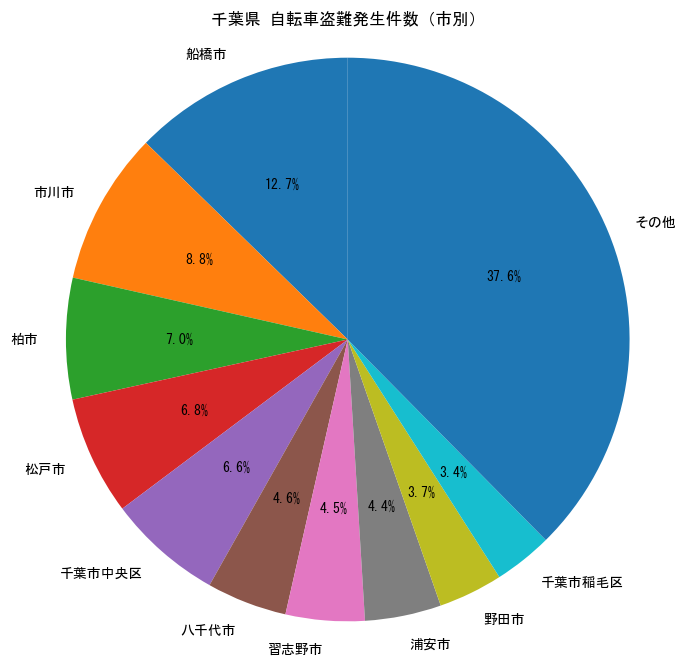

In [18]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import rcParams

# 日本語フォント設定（Windows の場合）
rcParams['font.family'] = 'MS Gothic'

filename = "jitensha.csv"

# 市ごとの件数を集計
city_counts = Counter()
with open(filename, encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        city = row.get('市区町村（発生地）', '')
        if city:
            city_counts[city] += 1

# 上位10市を表示（その他はまとめる）
top_cities = city_counts.most_common(10)
other_count = sum(city_counts.values()) - sum(count for _, count in top_cities)

labels = [city for city, _ in top_cities] + ['その他']
sizes = [count for _, count in top_cities] + [other_count]

# 円グラフ描画
plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("千葉県 自転車盗難発生件数（市別）")
plt.axis('equal')  # 円を真円に
plt.show()


船橋市とその他が同じ色になってしまいました…  


時間

In [26]:
df['発生日'] = pd.to_datetime(df['発生年月日（始期）'], format="%Y%m%d", errors='coerce')
df['月'] = df['発生日'].dt.month
df.groupby('月').size()

NameError: name 'pd' is not defined

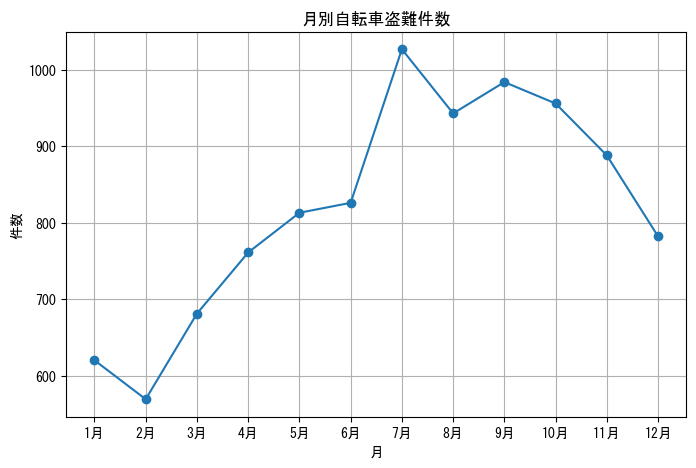

In [17]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 日本語フォントを設定
rcParams['font.family'] = 'MS Gothic'  # Windows の場合
# Mac の場合は 'Hiragino Sans', Linux は 'IPAexGothic' など

filename = "jitensha.csv"
months_count = [0]*12

with open(filename, encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for row in reader:
        date_str = row.get('発生年月日（始期）', '')
        try:
            date = datetime.strptime(date_str, "%Y%m%d")
            months_count[date.month-1] += 1
        except:
            continue

# 折れ線グラフ
plt.figure(figsize=(8,5))
plt.plot(range(1,13), months_count, marker='o')
plt.xticks(range(1,13), [f"{i}月" for i in range(1,13)])
plt.xlabel("月")
plt.ylabel("件数")
plt.title("月別自転車盗難件数")
plt.grid(True)
plt.show()



7月が一番多いですね！  
盗難数は暖かくなると増えて、寒くなると減るようです。虫みたいですね

In [4]:
df.groupby('施錠関係').size()

施錠関係
施錠した    3162
施錠せず    6781
dtype: int64

# 被害者の職業は…？

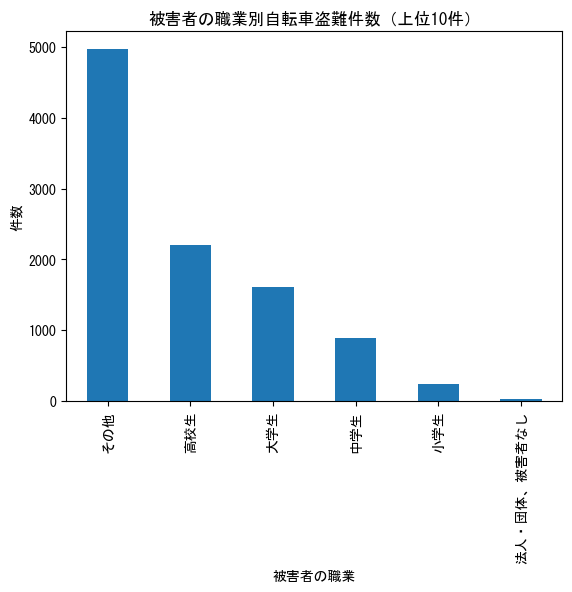

In [7]:
# bar graph of 被害者の職業
import matplotlib.pyplot as plt

# fix japanese font issue for mac
plt.rcParams['font.family'] = 'Hiragino Sans'

# fix japanese font issue for windows
plt.rcParams['font.family'] = 'MS Gothic'

occupation_counts = df['被害者の職業'].value_counts().head(10)  # top 10 occupations
occupation_counts.plot(kind='bar')
plt.xlabel('被害者の職業')
plt.ylabel('件数')
plt.title('被害者の職業別自転車盗難件数（上位10件）')
plt.show()

In [16]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
import folium

# CSV読み込み
df = pd.read_csv("jitensha.csv")

# 市区町村のみの住所を作成
df["市区町村住所"] = df["都道府県（発生地）"].fillna("") + df["市区町村（発生地）"].fillna("")

# ユニークな市区町村だけ geocode
unique_muni = df["市区町村住所"].unique()

geolocator = Nominatim(user_agent="jitensha_map", timeout=10)
cache = {}

print("市区町村単位の位置情報取得中…")

for addr in unique_muni:
    try:
        location = geolocator.geocode(addr)
        time.sleep(1)  # Nominatim 制限対策
        if location:
            cache[addr] = (location.latitude, location.longitude)
            print(addr, "→ 成功")
        else:
            cache[addr] = (None, None)
            print(addr, "→ 失敗")
    except:
        cache[addr] = (None, None)
        print(addr, "→ エラー")

# 元データに緯度経度を割り当て
df["lat"] = df["市区町村住所"].map(lambda x: cache[x][0])
df["lon"] = df["市区町村住所"].map(lambda x: cache[x][1])

# 緯度経度のあるデータだけ残す
df_map = df.dropna(subset=["lat","lon"])

# 地図の中心（平均値）
center_lat = df_map["lat"].mean()
center_lon = df_map["lon"].mean()

# folium マップ作成
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# 市区町村ごとのマーカー追加
for muni, group in df_map.groupby("市区町村住所"):
    lat = group.iloc[0]["lat"]
    lon = group.iloc[0]["lon"]
    count = len(group)
    popup_text = f"{muni}<br>件数: {count}"
    
    folium.CircleMarker(
        location=[lat, lon],
        radius=5 + count/2,  # 件数に応じて大きさを変える
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=popup_text
    ).add_to(m)

# 保存
m.save("jitensha_municipal_map.html")
print("市区町村マップを jitensha_municipal_map.html に保存しました！")


市区町村単位の位置情報取得中…
千葉県千葉市中央区 → 成功
千葉県千葉市緑区 → 成功
千葉県習志野市 → 成功
千葉県船橋市 → 成功
 → 失敗
千葉県市川市 → 成功
千葉県浦安市 → 成功
千葉県松戸市 → 成功
千葉県野田市 → 成功
千葉県柏市 → 成功
千葉県八街市 → 成功
千葉県佐倉市 → 成功
千葉県酒々井町 → 成功
千葉県成田市 → 成功
千葉県栄町 → 成功
千葉県富里市 → 成功
千葉県鎌ケ谷市 → 成功
千葉県印西市 → 成功
千葉県白井市 → 成功
千葉県多古町 → 成功
千葉県香取市 → 成功
千葉県東庄町 → 成功
千葉県神崎町 → 成功
千葉県銚子市 → 成功
千葉県旭市 → 成功
千葉県匝瑳市 → 成功
千葉県山武市 → 成功
千葉県横芝光町 → 成功
千葉県東金市 → 成功
千葉県大網白里市 → 成功
千葉県九十九里町 → 成功
千葉県一宮町 → 成功
千葉県茂原市 → 成功
千葉県白子町 → 成功
千葉県睦沢町 → 成功
千葉県長生村 → 成功
千葉県いすみ市 → 成功
千葉県御宿町 → 成功
千葉県勝浦市 → 成功
千葉県市原市 → 成功
千葉県木更津市 → 成功
千葉県袖ケ浦市 → 成功
千葉県君津市 → 成功
千葉県富津市 → 成功
千葉県南房総市 → 成功
千葉県鋸南町 → 成功
千葉県館山市 → 成功
千葉県鴨川市 → 成功
千葉県千葉市稲毛区 → 成功
千葉県千葉市美浜区 → 成功
千葉県千葉市花見川区 → 成功
千葉県八千代市 → 成功
千葉県我孫子市 → 成功
千葉県流山市 → 成功
千葉県千葉市若葉区 → 成功
千葉県四街道市 → 成功
市区町村マップを jitensha_municipal_map.html に保存しました！
